## purpose: trainデータにmissingがあるので、それを除去したい

In [62]:
import sys
sys.path.append("..")

import os
import json
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns

from PIL import Image, ImageOps
from skimage import io
from skimage.color import rgba2rgb, rgb2xyz
from tqdm import tqdm
from dataclasses import dataclass
from math import floor, ceil

from main import calibrate_magnetic_wifi_ibeacon_to_position
from main import extract_magnetic_strength
from io_f import read_data_file
from visualize_f import visualize_trajectory, visualize_heatmap
from main import calibrate_magnetic_wifi_ibeacon_to_position
from main import extract_magnetic_strength
from main import extract_wifi_rssi, extract_wifi_count
import processing

sns.set_theme()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
train_paths = glob.glob("../train/*/*/*.txt")

## check the issue

TYPE_WAYPOINT
TYPE_ACCELEROMETER
TYPE_MAGNETIC_FIELD
TYPE_GYROSCOPE
TYPE_ROTATION_VECTOR
TYPE_MAGNETIC_FIELD_UNCALIBRATED
TYPE_GYROSCOPE_UNCALIBRATED
TYPE_ACCELEROMETER_UNCALIBRATED
TYPE_WIFI
TYPE_BEACON


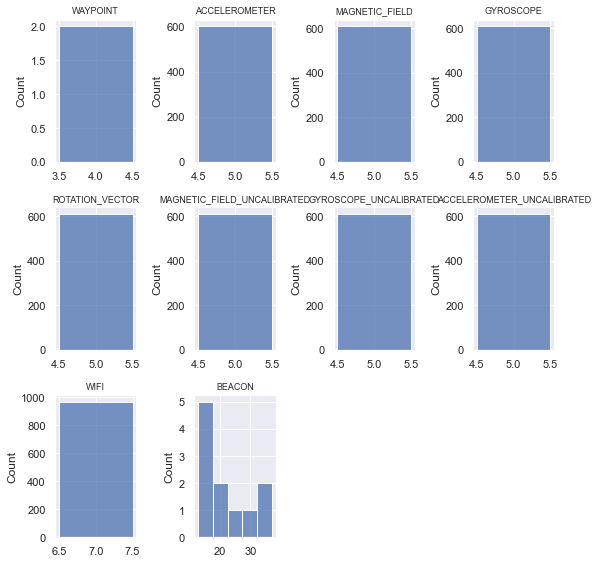

In [67]:
sample_path = "../train/5cd56b5ae2acfd2d33b58546/F3/5cf37e7c6a98eb0009603835.txt"
# calibrate_magnetic_wifi_ibeacon_to_position([sample_path])
with open(sample_path) as f:
    features = {}
    lines = f.readlines()
    N_end = len(lines)
    for i, line in enumerate(lines):
        if (i<7) | (i == N_end-1):
            continue
        vals = line.split("\t")
        if not vals[1] in features.keys():
            features[f"{vals[1]}"] = [len(vals)]
        else:
            features[f"{vals[1]}"].append(len(vals))
#         if vals[1] == "TYPE_BEACON":
#             print(vals)
#             print("\n")

fig = plt.figure(figsize=(8,8))
for i,(k,v) in enumerate(features.items()):
    ax = fig.add_subplot(3,4,i+1)
    print(k)
    k = k.split("TYPE_")[1]
    ax.set_title(f"{k}", fontdict={'fontsize':9})
    sns.histplot(v)
plt.tight_layout()
plt.show()

BEACONの部分で、deliminatorが機能していないのが分かる。

In [64]:
features["TYPE_BEACON"]

[autoreload of processing failed: Traceback (most recent call last):
  File "/Users/takahashigenki/anaconda3/envs/indoor/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/takahashigenki/anaconda3/envs/indoor/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/takahashigenki/anaconda3/envs/indoor/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/takahashigenki/anaconda3/envs/indoor/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 786, in exec_module
  File "<frozen importlib._bootstrap_external>", line 923, in get_code
  File "<frozen importlib._bootstrap_external>", line 853, in source_to_code
  File "<frozen importlib._

[29, 37, 37, 23, 13, 21, 13, 13, 21, 15, 13]